In [1]:
import requests
from IPython.core.display import HTML
HTML(f"""
<style>
@import "https://cdn.jsdelivr.net/npm/bulma@0.9.4/css/bulma.min.css";
</style>
""")

# Principal Component Analysis (PCA)
In this in-class exercise you will be guided through the steps necessary for implementing a PCA on a sequence of human poses. You will work with the poses data, which was used for the exercises in week 2
. The dataset has a shape of $(1403, 100, 25*2)$. This means that there are 1403 pose sequences. Each sequence is a 100-frames time series capturing human poses. Each pose consists of 25 skeletal joints, where each joint is an x and y coordinate ($25*2$). For this exercise, you will use a single pose sequence of 100 frames and apply dimension reduction to the selected sequence. 
The following cells loads the libraries, the dataset and provides functions for plotting the poses:


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from pca_utils import *

# Suppress the specific warning
warnings.filterwarnings("ignore")

## 1. Data inspection
The cell below:
1. Loads the data and constructs the data matrix.
2. Reshapes the data into a $100x50$ data-matrix where each row contains a flattened vector of a pose.
3. Selects the first 40 frames from a single pose sequence and plot it.


---
**Task 1 (easy): Loading and inspecting the data👩‍💻**
1. Run the code cell below.
2. Change the code to display the sequences 4,5,7 and visually observe how these sequences vary. 


---

(1403, 100, 25, 2)
(1403, 100, 50)


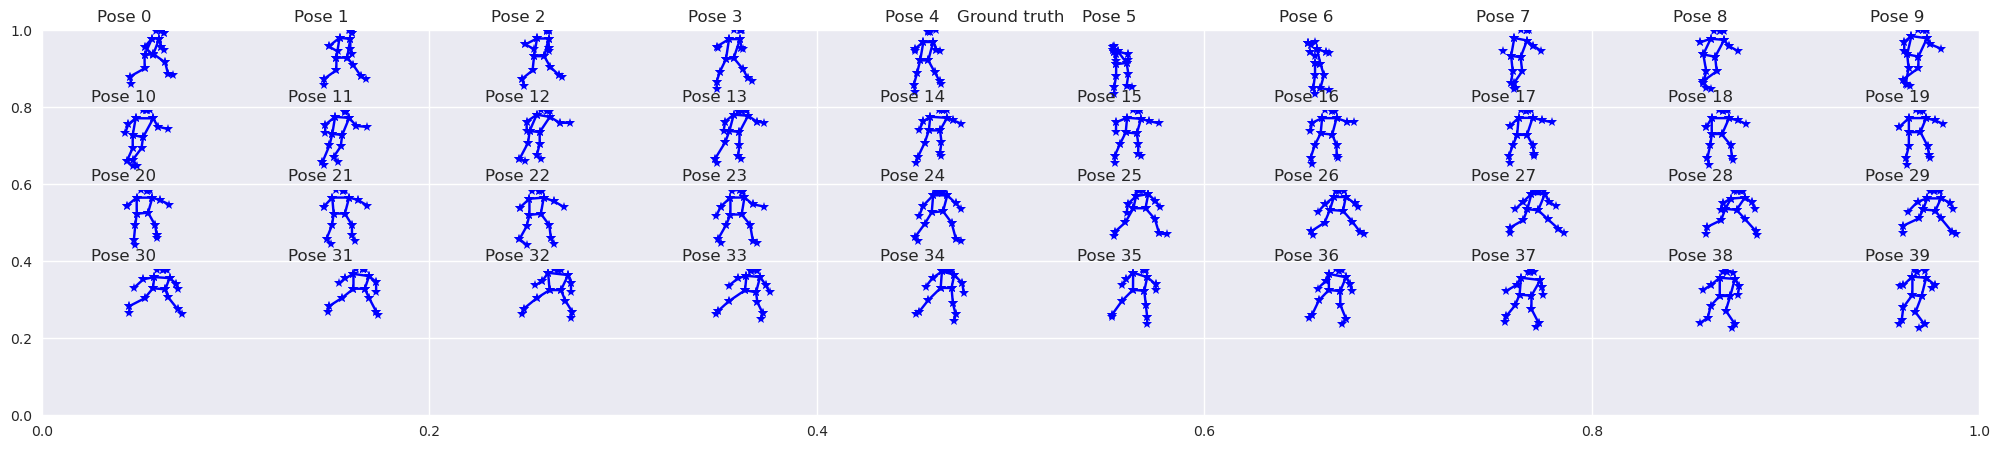

In [ ]:
data = np.load('Poses_norm.npy')
print(data.shape)
N,T,D,C = data.shape
reshaped_data = data.reshape(N,T,D*C)
dataset = reshaped_data[19]
print(reshaped_data.shape)

# Define the new desired shape (40, 50)
nr_of_frames=40
new_shape = (nr_of_frames, 50)
# Reshape the array to the new shape
reshaped_data2 = np.empty(new_shape)  # Create an empty array with the new shape
reshaped_data2[:] = dataset[:new_shape[0], :]  

reshaped_data3 = np.empty(new_shape)
reshaped_data3[:] = dataset[:new_shape[0], :]  


plot_single_sequence(reshaped_data2,pose_name='Pose',color='blue')

## 2. Covariance matrix
In the following tasks you will construct and inspect the covariance matrix for a given pose sequence. 

---
**Task 2 (easy): Covariance matrix - NumPy method👩‍💻**
1. Run the cell below to obtain and plot the covariance matrix. 
2. What does the heatmap tell us about the relationship between the variables (skeletal joint coordinates)? 


---

<Axes: >

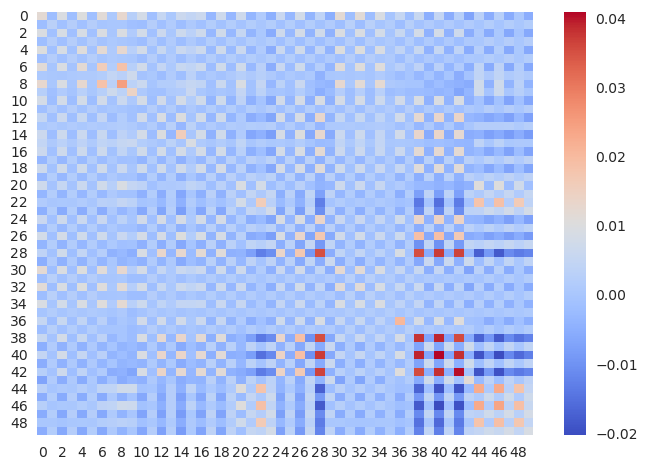

In [4]:
# Calculate the covariance matrix for the entire dataset
cov_matrix = np.cov(dataset, rowvar=False)
# Plotting
sns.heatmap(cov_matrix, cmap='coolwarm')

Currently, the dataset is organized by frames, with each frame having alternating x and y coordinates in the order:  $[x_1, y_1, x_2, y_2, \dots, x_{25}, y_{25}]$. The cell below rearranges the data for illustrative purposes, grouping all x-coordinates first, followed by all y-coordinates: $[x_1, x_2, \dots, x_{25}, y_1, y_2, \dots, y_{25}]$.


In [14]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = dataset.shape

# Separate even and odd columns
even_indexes = np.arange(0, num_columns, 2)  # Even indexes (0, 2, 4, ...)
odd_indexes = np.arange(1, num_columns, 2)   # Odd indexes (1, 3, 5, ...)

grouped_x_y = dataset[:, np.concatenate((even_indexes, odd_indexes))]

# Rearrange the dataset


all_indexes = np.arange(0, num_columns, 1)

grouped_x_y_2 = dataset[:, all_indexes]



---
**Task 3 (easy): Covariance matrix - rearranged data👩‍💻**
1. Run the cell below to obtain and plot the covariance matrix of the rearranged data. 


---

<Axes: >

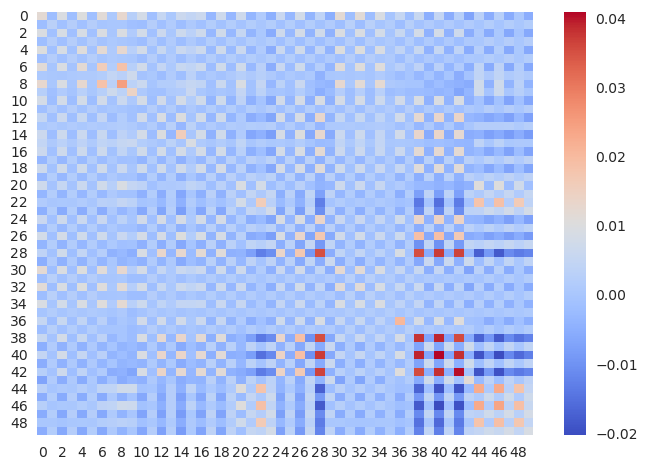

In [17]:
#cov_matrix = np.cov(grouped_x_y, rowvar=False)
#sns.heatmap(cov_matrix, cmap='coolwarm')

cov_matrix_2 = np.cov(grouped_x_y_2, rowvar=False)
sns.heatmap(cov_matrix_2, cmap='coolwarm')


---
**Task 4 (medium): Implement your own covariance matrix _(optional)_👩‍💻**
The following task should only be completed if you have extra time and want to try constructing the covariance matrix yourself. Use the `rearranged_dataset`
 to:
1. Construct the covariance matrix $\mathbf{C}$:


$$

\mathbf{C} = \frac{1}{N} \sum_{i=1}^{N} (\mathbf{x}_i - \boldsymbol{\bar{x}})(\mathbf{x}_i - \boldsymbol{\bar{x}})^\top

$$
where $\mathbf{x}_i$ represents the $i$-th coordinate in the dataset and $\boldsymbol{\bar{x}}$ is the mean vector obtained by averaging the coordinates for each joint $\boldsymbol{\bar{x}} = \frac{1}{N} \sum_{i=1}^{N} \mathbf{x}_i$

**Hint**
To center the data first calculate the mean vector, then subtract it from each data point of the pose sequence.

2. Create a heatmap of the covariance matrix.
3. Compare the covariance matrix obtained in this task to the one obtained in the previous task. How and why are they similar/different?


---

In [0]:
# write your solution here


---
**Task 5 (easy): Reflection _(optional)_💡**
1. How would you change the above pipeline for obtaining the covariance matrix for all of the 1403 pose sequences? 


---## 3. Eigenvalues and eigenvectors
The following steps involve implementing the eigen decomposition of the covariance matrix.

---
**Task 6 (easy): Eigen decomposition👩‍💻**
1. Run the cell below to find the eigenvalues and eigenvectors of the covariance matrix.
2. Plot the eigenvalues as in the plot below.


---

<Axes: >

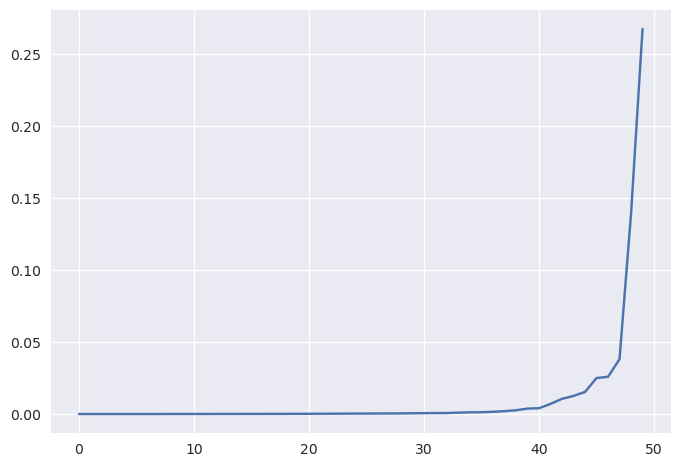

In [32]:
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

# write your solution here


#print(eigenvectors)

#sns.lineplot(x="Principal component index", y="eigenvalues", data=eigenvalues)

sns.lineplot(eigenvalues)


---
**Task 7 (easy): Properties of eigenvalues and eigenvectors👩‍💻**
1. Determine whether all of the eigenvalues are non-negative (greater than or equal to 0)
2. Verify that the obtained eigenvectors are orthogonal. An efficient way is to use the definition of an orthonormal matrix ($A^ \top A=I$). Alternatively, you can verify them individually.


**Hint**
Notice that the values may be slightly imprecise due to the finite precision of numerical representations. You can use `np.isclose`
 to check whether two values are close to each other or not.

3. What is the total variance of the dataset? 


**Hint**
The sum of all eigenvalues should equal the total variance in the original data, however due to numerical imprecision you might get slightly different values.


---

In [40]:
# Write your solution here

#first
for elem in eigenvalues:
    if elem < 0:
        print("below zero value")


if not np.all(np.isclose(eigenvectors.T @ eigenvectors, np.identity(eigenvectors.T.shape[0]))):
    print(eigenvectors.T @ eigenvectors)
    

#third
print(np.sum(eigenvalues))





0.5649677720470421



---
**Task 8 (easy): Sorting Eigenvalues and Eigenvectors👩‍💻**
1. Use [np.argsort](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)
 to get the list of permutation indices of the eigenvalues in descending order, then sort them. 
2. Use the list of indices to sort the eigenvectors based on the eigenvalues. 
3. Plot the sorted eigenvalues. The plot should have a similar shape as the figure below.


---

[6.42614521e-06 8.80767058e-06 1.48930007e-05 1.56390594e-05
 2.37131613e-05 2.54374518e-05 2.83748868e-05 3.48601490e-05
 4.15509075e-05 4.82388195e-05 6.44923153e-05 6.62848101e-05
 7.24542011e-05 8.71647263e-05 9.14702697e-05 9.82869712e-05
 1.04955288e-04 1.20237873e-04 1.33540350e-04 1.64371870e-04
 1.73872425e-04 2.11773321e-04 2.41327882e-04 2.73240865e-04
 3.30180517e-04 3.41304232e-04 3.82302016e-04 4.13275055e-04
 4.30516623e-04 5.27542844e-04 6.02958519e-04 6.48998658e-04
 6.93553629e-04 9.55825542e-04 1.17687132e-03 1.24551625e-03
 1.55690399e-03 1.99949642e-03 2.62280860e-03 3.77282261e-03
 4.05182040e-03 7.02555558e-03 1.05767539e-02 1.25931745e-02
 1.53492776e-02 2.49830888e-02 2.58630544e-02 3.81234987e-02
 1.39170343e-01 2.67378914e-01]
[2.67378914e-01 1.39170343e-01 3.81234987e-02 2.58630544e-02
 2.49830888e-02 1.53492776e-02 1.25931745e-02 1.05767539e-02
 7.02555558e-03 4.05182040e-03 3.77282261e-03 2.62280860e-03
 1.99949642e-03 1.55690399e-03 1.24551625e-03 1.17687

<Axes: >

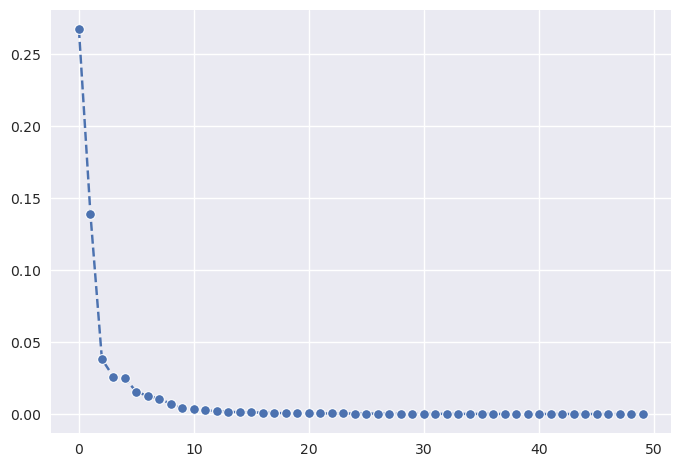

In [ ]:
# Write your solution here
print(eigenvalues)
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort indices in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]

print(sorted_eigenvalues)

sns.lineplot(data=sorted_eigenvalues, linestyle='--', marker='o')



**Info**
We can chose to retain a certain percentage of the total variation by selecting the number of principal components where the sum of the eigenvalues correspond to the desired variance. It is convenient to calculate the acummulative sum of the eigenvalues (sum of the variances) to easily determine the number of components needed for retaining a certain percentage of the total variance. This can be achieved using the [`cumsum`
](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)
 function. 


---
**Task 9 (easy): Retain variance👩‍💻**
Run the cell below to calculate the normalized cumulative explained variance.
1. Plot the cumulative variance as in the figure below.
2. How many components are needed to retain: $50$%, $80$%, $90$%, $95$% of the variation
3. For the following tasks, select $k$ such that $95$% of the variation is retained.


---

2
4
6
9
k has to be 9 to have 95% variation


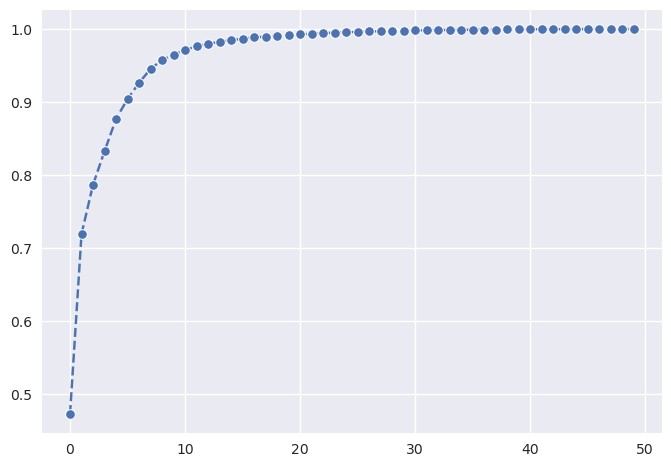

In [61]:
cumulative_variance_ratio = np.cumsum(sorted_eigenvalues) / np.sum(sorted_eigenvalues)

sns.lineplot(cumulative_variance_ratio, linestyle='--', marker='o')

def tester(cap):
    points_needed = 0
    for elem in cumulative_variance_ratio:
        points_needed +=1
        if(elem >= cap):
            print(points_needed)
            return points_needed

tester(0.5)
tester(0.8)
tester(0.9)
k = tester(0.95)


print(f'k has to be {k} to have 95% variation')

# PCA - In-class week 2
## 4. Mixing parameters
The following section describes how much each variable contributes to the selected principal components:

---
**Task 10 (medium): Mixing parameters👩‍💻**
1. Change the cell below to construct the orthonormal $\Phi$ matrix containing the first $k = 9$ eigenvectors, where:


$$
{\Phi} = 
\begin{bmatrix}
    | & | & \cdots & | \\
    \Phi_1 & \Phi_2 & \cdots & \Phi_9 \\
    | & | & \cdots & |
\end{bmatrix}
$$
2. Define the mixing parameters $m_i = \sqrt{\lambda_i} \Phi_{i} $, where $\Phi_{i}$ represents the $i$-th column of $\Phi$ (the selected eigenvectors) and $\lambda_i$ represents the corresponding eigenvalue. 


---

In [0]:
# Write your solution here


print(mixing_params.shape)


---
**Task 11 (medium): Plot the mixing parameters💡**
1. Run the cell below to plot the contribution of each variable to the principal components. 
2. Use the plot to describe how each of the principal components make use of the different variables of the pose coordinates in the original data. 
3. What do positive and negative values in the principal components indicate, and how do they relate to the original data?


---

In [0]:
num_variables = dataset.shape[1]
bar_width = 0.4  # Width of the bars

# Plotting only the first two principal components
plot_pca_loadings(
    mixing_params=mixing_params,
    dataset=dataset,
    bar_width=0.4,
    colors=['skyblue', 'salmon'],  
    component_indices=[1, 2],      
    show_individual=True,
    show_combined=True,
    save_plots=False               
)

In [0]:
# Write your solution here

## 5. Generative process - Projecting to latent space and back
The pose data can be mapped to the latent space spanned by the principal components (eigenvectors) by: 
$$\Phi^\top(x-\mu)$$
 where 

$$
{\Phi} = 
\begin{bmatrix}
    | & | & \cdots & | \\
    \Phi_1 & \Phi_2 & \cdots & \Phi_9 \\
    | & | & \cdots & |
\end{bmatrix}
$$
and $\Phi_i$ are the eigenvectors.
The following steps will implement this process. 

---
**Task 12 (easy): Project to subspace👩‍💻**
Run the cell below to center the data. Use the centered data to:
1. Project the original data onto the selected eigenvectors using $\Phi^\top(x-\mu)$. 

2. To plot the projected data.



---

In [0]:
# Calculate the mean vector
mean_vector = np.mean(dataset, axis=0)

# Subtract the mean from each data point
centered_data = dataset - mean_vector

# Write your solution here


plot_pca_pairwise_scatter(
    dataset=dataset,
    phi=phi,
    num_components=9,                
    figsize=(10, 10),
    marker='.',
    xlim=(-1.5, 1.5),
    ylim=(-1.5, 1.5),
    save_plot=False,                  
    save_dir='plots',                 
    file_format='png'                 
)

print(projected_data.T.shape)


---
**Task 13 (easy): Re-project from latent space to original data space👩‍💻**
1. Project the data from latent space to the original data space using $\Phi^\top x + \mu$.


---

In [0]:
# Write your solution here


print(reconstructed_data.shape)


---
**Task 14 (medium): Plotting original and reconstructed data👩‍💻**
1. Run the cell below to plot the first `nr_of_frames`
 from the original and the reconstructed data. 


---

In [0]:
# Write your solution here


# Define the new shape you want (40, 50)
nr_of_frames=40
new_shape = (nr_of_frames, 50)
# Reshape the array to the new shape
reshaped_data2 = np.empty(new_shape)
reshaped_data3 = np.empty(new_shape)
reshaped_data2[:] = dataset[:new_shape[0], :]
reshaped_data3[:] = reconstructed_data[:new_shape[0], :]    

plot_single_sequence(reshaped_data2,pose_name='Original',color='blue')
plot_single_sequence(reshaped_data3,pose_name='Reconstructed',color='red')


---
**Task 15 (easy): Plotting original and reconstructed data👩‍💻**
1. Use the function below to rerun the analysis. Change the number of components $k = 1,2,4,40 $.


---

In [0]:
# function for PCA
pca_reconstruction(dataset=dataset, k=9, num_frames=40)